In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##https://apps.bea.gov/national/Release/XLS/Survey/Section1All_xls.xlsx

df=pd.read_excel('Section1All_xls.xlsx','T11500-Q',skiprows=7).query('Line in ["1","2","3","7"]').iloc[:,-16:]
df.index=['Prices','Labor','Other Inputs','Profits']
df2=df.transpose()
df2.index=pd.to_datetime(list(df2.index))
#df2=df2.iloc[:-1,:]

df_delta=df2.iloc[-1]-df2
df_delta = df_delta[:-1]

df_out=df_delta.divide(df_delta.Prices,axis=0)[['Labor','Other Inputs','Profits']]
df_out=df_out[['Profits','Labor','Other Inputs']]

df_pos = df_out.copy()
df_pos[df_pos < 0] =0

df_neg = df_out.query('Profits <0').copy()
df_neg[df_neg > 0] =0

df_out2=pd.concat([df_out[df_out.index.month==1],pd.DataFrame(df_out.iloc[-2,:]).transpose()],axis=0)*100
df_out2

,Profits,Labor,Other Inputs
2019-01-01,31.400966,53.140097,14.975845
2020-01-01,34.010152,50.761421,14.720812
2021-01-01,17.073171,55.487805,26.829268
2022-01-01,19.298246,61.403509,17.543860
2022-04-01,-20.000000,110.000000,5.000000


/Users/christopherconlon/miniforge3/envs/np_veclib/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1594: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


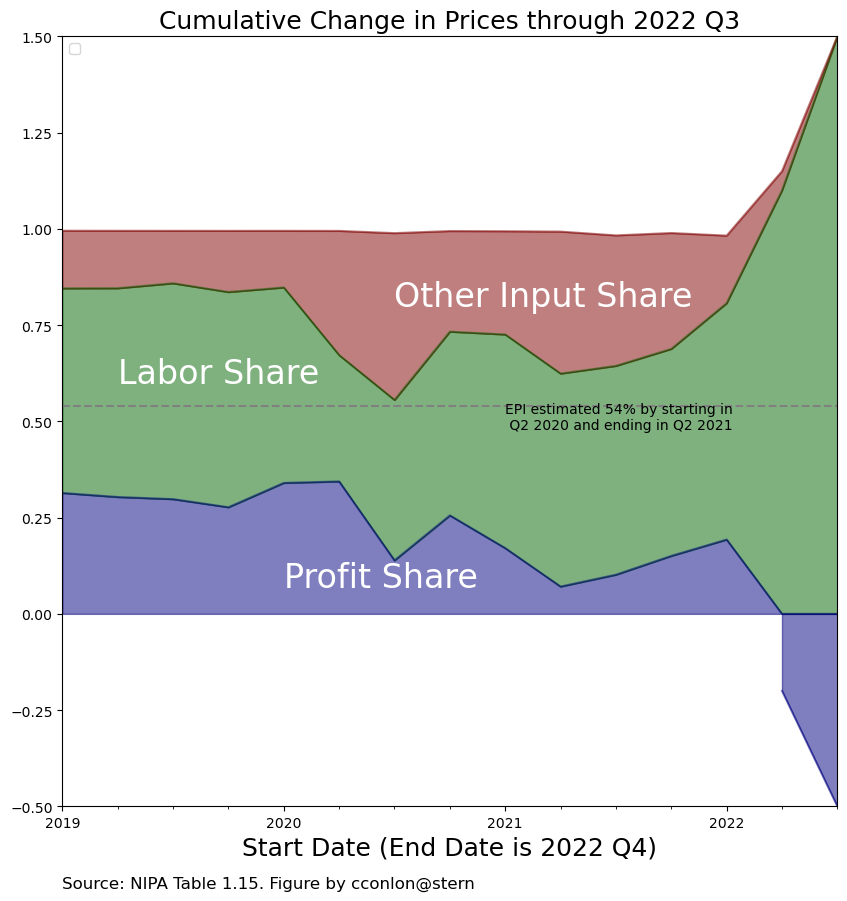

In [212]:
ax=df_pos.plot.area(figsize=(10,10),color=['navy','darkgreen','maroon'],alpha=0.5)
df_neg[['Profits']].plot.area(figsize=(10,10),color=['navy'],alpha=0.5,ax=ax)

plt.legend('')
plt.annotate('Profit Share',('2020-01-01',0.07),color='White',fontsize=24)
plt.annotate('Labor Share',('2019-06-01',0.6),color='White',fontsize=24)
plt.annotate('Other Input Share',('2020-09-01',0.8),color='White',fontsize=24)
plt.annotate('Source: NIPA Table 1.15. Figure by cconlon@stern', (0,0), (0,-50), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.title('Cumulative Change in Prices through 2022 Q3',fontsize=18)
plt.xlabel('Start Date (End Date is 2022 Q4)',fontsize=18)
plt.annotate("EPI estimated 54% by starting in\n Q2 2020 and ending in Q2 2021",
            xy=('2021-03-01', 0.48), xycoords='data',
            xytext=('2021-03-01', 0.48),
             
            )
plt.axhline(y = 0.54, color = 'gray', linestyle = '--')
plt.ylim(-0.5,1.5)
plt.savefig('greedflation.pdf', bbox_inches='tight')

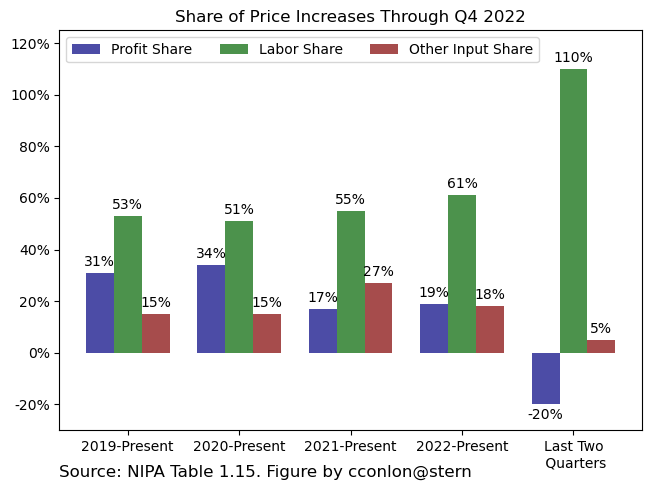

In [267]:
import matplotlib.ticker as mtick

value_dict = df_out2.reset_index(drop=True).to_dict('series')
x = np.arange(5)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',sharey=True)

color_dict={'Profits':'navy','Labor':'darkgreen','Other Inputs':'maroon'}

for attribute, measurement in value_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement.round(0), width, label=attribute,color=color_dict[attribute], alpha=0.7, )
    ax.bar_label(rects, padding=3,fmt='%.0f%%')
    multiplier += 1

# # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Share of Price Increases Through Q4 2022')
ax.set_xticks(x + width, ['2019-Present','2020-Present','2021-Present','2022-Present','Last Two\n Quarters'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.ylim(-30,125)


ax.legend(['Profit Share','Labor Share', 'Other Input Share'], loc='upper left', ncols=3)
plt.annotate('Source: NIPA Table 1.15. Figure by cconlon@stern', (0,0), (0,-25), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('greedflation_bars.pdf', bbox_inches='tight')
plt.savefig('greedflation_bars.png', bbox_inches='tight')
